<font color="#CA3532"><h1 align="left">EVALUACIÓN APRENDIZAJE SUPERVISADO.</h1></font>
<font color="#6E6E6E"><h3 align="right">Pilar Campos López</h3></font> 
<font color="#6E6E6E"><h4 align="right"> pilarcamposlopez@gmail.com  </h4></font> 

Considere el dataset proporcionado que contiene	información	sobre	distintos sensores corporales y	cuyo objetivo es predecir la postura corporal durante la realización de	un ejercicio. 
Los	distintos tipos	de posturas	están codificados en una variable llamada classe con las letras	de la A	a la E,	representando, respectivamente:
- A:	postura	correcta en	la realización	del	ejercicio.
- B-E:	distintos errores típicos durante la realización del ejercicio.

El	ejercicio consiste,	por	tanto,	en	construir	un	modelo	que	sea	capaz de predecir la postura a partir del resto	de variables. 

Se sugiere un	rápido análisis	exploratorio del conjunto de datos para determinar si:
- Existen	variables	que	haya	que	descartar	por	ser	identificadores	(o asimilables	a	identificadores) o que no aporten información útil para resolver el	problema.
- Existen variables con demasiados valores nulos como para poder ser	utilizadas.
- Existen variables con	valores	en distintos órdenes de	magnitud, circunstancia	que	podría	afectar	al	rendimiento	de determinados modelos.

### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./data/datos_train.csv')

### Tomamos conciencia del data set

In [3]:
print("Tamaño dataset del dataset", df.shape)
print("Número de variables/predictores (columnas)", df.shape[1])
print("Número de registros (instancias/filas)", df.shape[0])

Tamaño dataset del dataset (19622, 157)
Número de variables/predictores (columnas) 157
Número de registros (instancias/filas) 19622


In [4]:
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,carlitos,1323084231,788290,05/12/2011 11:23,1.41,8.07,-94.4,3,NaN,NaN,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,carlitos,1323084231,808298,05/12/2011 11:23,1.41,8.07,-94.4,3,NaN,NaN,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,carlitos,1323084231,820366,05/12/2011 11:23,1.42,8.07,-94.4,3,NaN,NaN,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,carlitos,1323084232,120339,05/12/2011 11:23,1.48,8.05,-94.4,3,NaN,NaN,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,carlitos,1323084232,196328,05/12/2011 11:23,1.48,8.07,-94.4,3,NaN,NaN,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


Tomamos conciencia del tipo de variables que tenemos en el dataset. Como podemos observar disponemos de enteros, floats y objects que tendremos que tratar de forma independiente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 157 entries, user_name to classe
dtypes: float64(127), int64(27), object(3)
memory usage: 23.5+ MB


In [6]:
df.dtypes

user_name                object
raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
cvtd_timestamp           object
roll_belt               float64
                         ...   
accel_forearm_z           int64
magnet_forearm_x          int64
magnet_forearm_y        float64
magnet_forearm_z        float64
classe                   object
Length: 157, dtype: object

Vemos unas estadísticas básicas del data set

In [7]:
df.describe(include='all')

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
count,19622,1.962200e+04,19622.000000,19622,19622.000000,19622.000000,19622.000000,19622.000000,396.000000,374.000000,...,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622
unique,6,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,adelmo,NaN,NaN,28/11/2011 14:14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,3892,NaN,NaN,1498,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5580
mean,NaN,1.322827e+09,500656.144277,NaN,64.407197,0.305283,-11.205061,11.312608,-0.220248,4.334199,...,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745,NaN
std,NaN,2.049277e+05,288222.879958,NaN,62.750255,22.351242,95.193926,7.742309,2.924547,11.582812,...,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747,NaN
min,NaN,1.322490e+09,294.000000,NaN,-28.900000,-55.800000,-180.000000,0.000000,-2.121212,-2.190476,...,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000,NaN
25%,NaN,1.322673e+09,252912.250000,NaN,1.100000,1.760000,-88.300000,3.000000,-1.329350,-1.106648,...,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000,NaN
50%,NaN,1.322833e+09,496380.000000,NaN,113.000000,5.280000,-13.000000,17.000000,-0.899278,-0.150950,...,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000,NaN
75%,NaN,1.323084e+09,751890.750000,NaN,123.000000,14.900000,12.900000,18.000000,-0.219149,3.177705,...,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000,NaN


Como podemos obsevar tenemos tres variables objeto.
Consideramos que la variable user_name puede ser identificadora ya que la persona va asociada al movimiento por lo que en principio vamos a descartar esa variable.
Además observamos que cvtd_timestamp es un objeto que no nos proporciona información para el caso que estamos estudiando por lo tanto también eliminamos esa variable. 


### Valores nulos
Comprobamos los valores nulos.

In [8]:
df.isnull().any(axis=0).sum()

100

Creamos una función que nos muestra el número de variables que tenemos, las variables con valores nulos así como el porcenetaje de valores nulos en cada una de las variables.

In [9]:
 def missing_values_table(df): 
        mis_val = df.isnull().sum() 
        mis_val_percent = 100 * df.isnull().sum() / len(df) 
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
        mis_val_table_ren_columns = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'}) 
        mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values( '% of Total Values', ascending=False).round(1) 
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.") 
        return mis_val_table_ren_columns 


In [10]:
missing_values_table(df)

Your selected dataframe has 157 columns.
There are 100 columns that have missing values.


,Missing Values,% of Total Values
skewness_yaw_forearm,19622,100.0
skewness_yaw_belt,19622,100.0
kurtosis_yaw_forearm,19622,100.0
skewness_yaw_dumbbell,19622,100.0
kurtosis_yaw_dumbbell,19622,100.0
...,...,...
avg_pitch_belt,19216,97.9
amplitude_roll_dumbbell,19216,97.9
amplitude_pitch_dumbbell,19216,97.9
var_roll_belt,19216,97.9


El número de missing values en las variables es muy grande y no tendríamos capacidad predictiva con esas variables, además el número de variables de dataset es enorme. El primer paso que vamos a intentar es eliminar esas variables creando un nuevo dataframe.

In [11]:
df2=df.dropna(axis=1)

In [12]:
df2.describe(include='all')

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
count,19622,1.962200e+04,19622.000000,19622,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,...,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622
unique,6,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,adelmo,NaN,NaN,28/11/2011 14:14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,3892,NaN,NaN,1498,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5580
mean,NaN,1.322827e+09,500656.144277,NaN,64.407197,0.305283,-11.205061,11.312608,-0.005592,0.039588,...,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745,NaN
std,NaN,2.049277e+05,288222.879958,NaN,62.750255,22.351242,95.193926,7.742309,0.207329,0.078236,...,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747,NaN
min,NaN,1.322490e+09,294.000000,NaN,-28.900000,-55.800000,-180.000000,0.000000,-1.040000,-0.640000,...,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000,NaN
25%,NaN,1.322673e+09,252912.250000,NaN,1.100000,1.760000,-88.300000,3.000000,-0.030000,0.000000,...,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000,NaN
50%,NaN,1.322833e+09,496380.000000,NaN,113.000000,5.280000,-13.000000,17.000000,0.030000,0.020000,...,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000,NaN
75%,NaN,1.323084e+09,751890.750000,NaN,123.000000,14.900000,12.900000,18.000000,0.110000,0.110000,...,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000,NaN


In [13]:
print("Tamaño dataset del dataset", df2.shape)
print("Número de variables/predictores (columnas)", df2.shape[1])
print("Número de registros (instancias/filas)", df2.shape[0])

Tamaño dataset del dataset (19622, 57)
Número de variables/predictores (columnas) 57
Número de registros (instancias/filas) 19622


### EDA para variables categóricas

Creamos un dataframe de variables categóricas para tratarlas de forma independiente

In [14]:
ds_cat = df.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,user_name,cvtd_timestamp,classe
0,carlitos,05/12/2011 11:23,A
1,carlitos,05/12/2011 11:23,A


Como podemos observar tenemos tres variables categóricas que trataremos de la siguiente forma:
- user_name: consideramos que puede ser identificadora ya que la persona va asociada al movimiento por lo que en principio también vamos a descartar esa variable.
- cvtd_timestamp es un objeto que no nos proporciona información para el caso que estamos estudiando, ya que la fecha en la que se ha tomado la medición no es relevante, por lo tanto también eliminamos esa variable.
- clasee es la variable objetivo

In [15]:
df2=df2.drop(['user_name'],axis=1)

In [16]:
df2=df2.drop(['cvtd_timestamp'],axis=1)

In [17]:
y = df2["classe"].values

In [18]:
df2=df2.drop(['classe'],axis=1)

In [19]:
df2.dtypes

raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_arm_z              int64
roll_dumbbell           float64
pitch_dumbbell          float64
yaw_dumbbell            float64
total_ac

### ESTANDARIZACIÓN
Vemos que los valores de las variables difieren unos de otros en rangos diversos por lo tanto hay que estandarizar para que las variables cuya magnitud es mucho mayor no tengan más peso que las otras

Estandarizamos restando la media y dividiendo por la desviación típica

In [20]:
standardize = lambda x: (x - np.mean(x))/np.std(x)
df3=df2.apply(standardize)
df3.shape

(19622, 54)

Estandarizamos usando la librería sklearn

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df = scaler.fit_transform(df2)
df4 = pd.DataFrame(scaled_df, columns=list(df2))
df4.shape

(19622, 54)

In [22]:
df3.to_csv('out.csv')

## Primeras visualizaciones
Visualicemos todas las variables. Para ello hacemos histogramas y diagramas de cajas (boxplot).

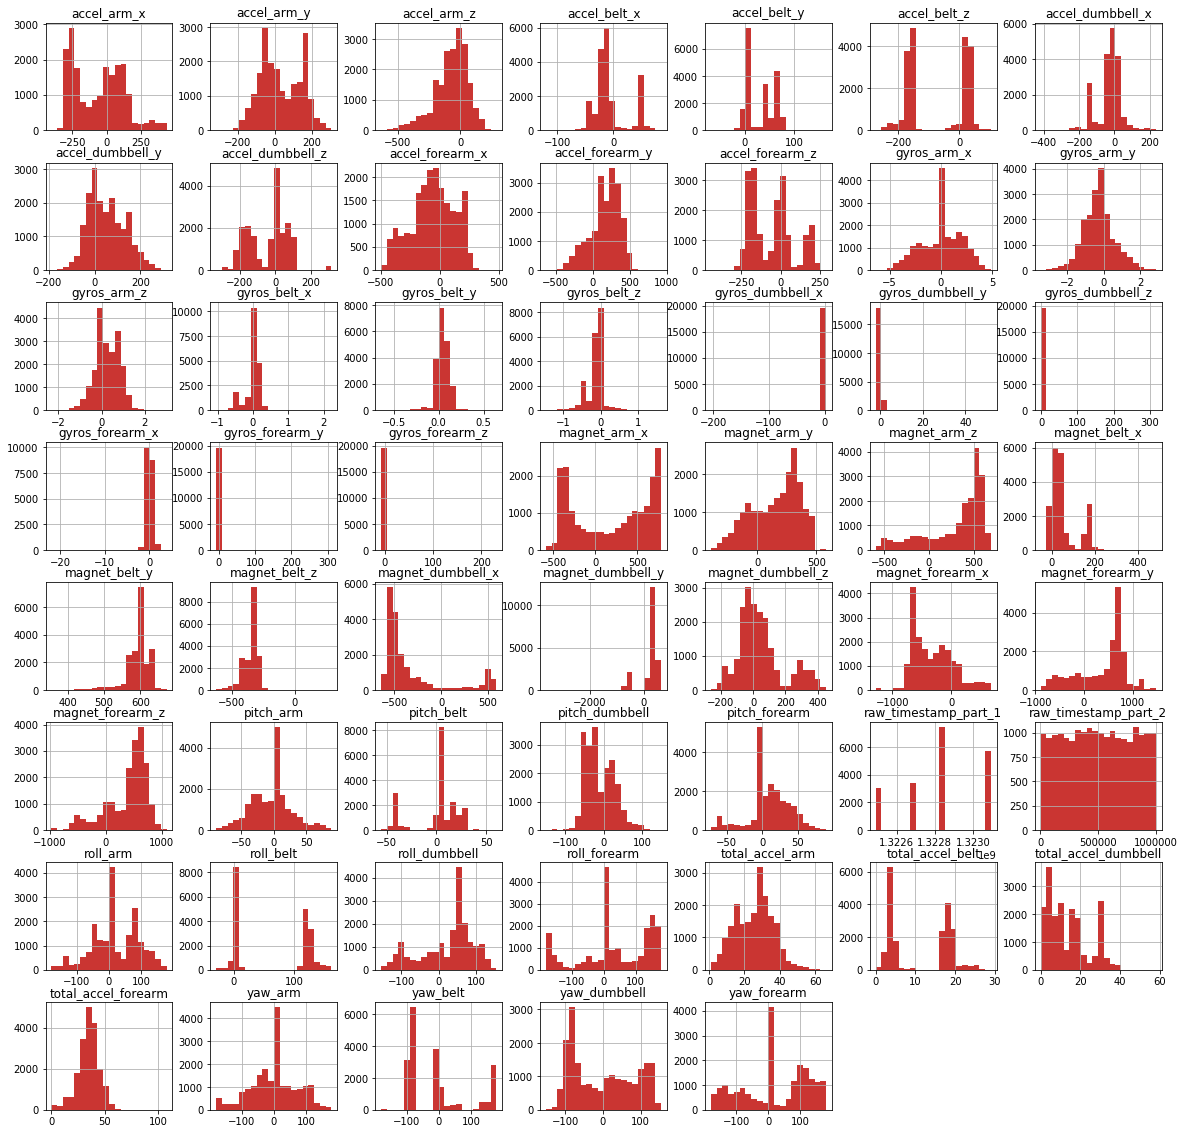

In [23]:
df2.hist(bins = 20, figsize = (20,20), color = '#CA3532')
plt.show()

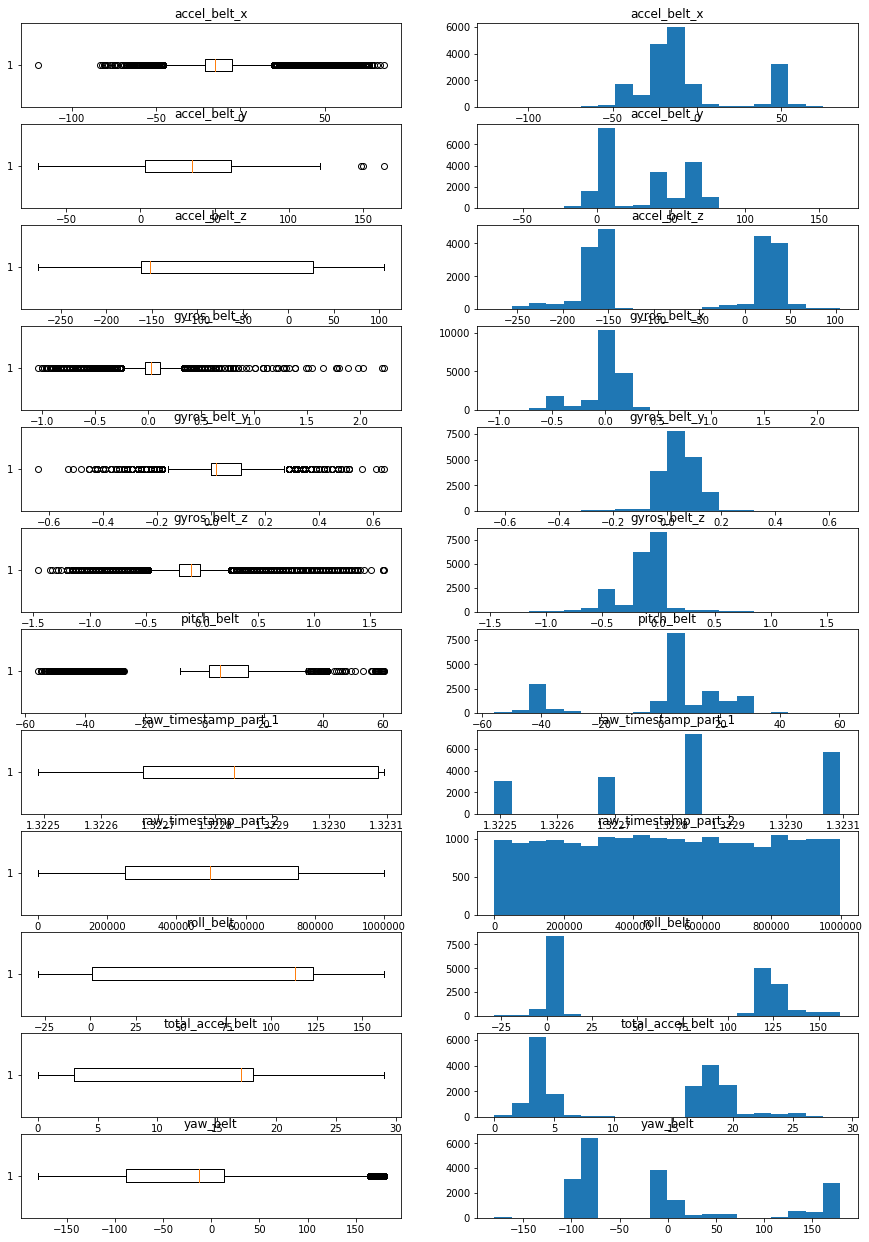

In [24]:
num_var_a_graficar = 12

plt.figure(figsize=(15,100))
for i, var in enumerate(np.sort(df2.columns[:num_var_a_graficar])):
    plt.subplot(df2.columns.shape[0],2,2*i+1)
    plt.boxplot(df2[var], vert=False)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(df2.columns.shape[0],2,2*i+2)
    plt.hist(df2[var], bins = 20)
    plt.xlabel('')
    plt.title(var)

### Matriz de correlaciones

En el ejemplo anterios hemos podido comprobar relaciones de variables categorizadas con el valor medio de la variable objetivo. Aquí vamos a ver la matriz de correlaciones de todas las variables, incluida la variable objetivo.

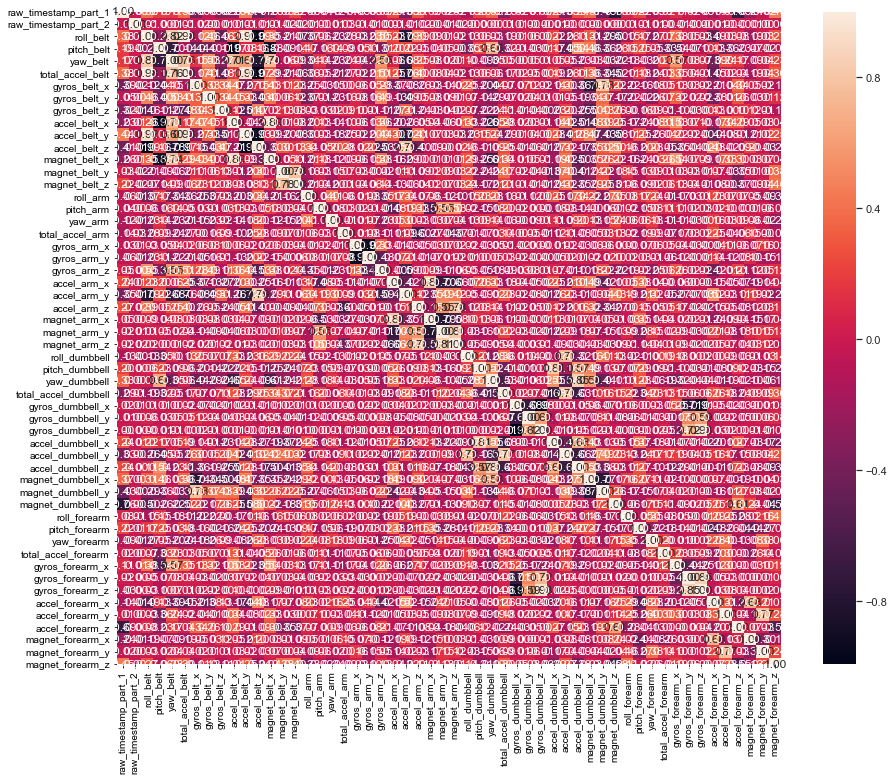

In [25]:
cm = df2.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

### APRENDIZAJE SUPERVISADO

In [26]:
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix

def doGridSearch(model, grid, scores, X_train, y_train, X_test, y_test, columns, indices):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
#en el cv se puede pasar también un objeto de tipo cv
#el 10 es un valor estándar que tienes un compromiso bastante justo
#scoring le dices que métrica escoges
#Si quisiera hacerlo random
#randomizedSearchCV en del grid para que sea aleatorio en lugar de la rejilla
        clf=GridSearchCV(model, grid, cv=10, scoring='%s' % score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()

        means=clf.cv_results_['mean_test_score']
        stds =clf.cv_results_['std_test_score']

        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()

        conf=pd.DataFrame(
            confusion_matrix(y_test, y_pred),
            columns=columns,
            index  =indices
        )
        print(conf)
        
        return clf.best_estimator_
    #devuelve el mejor modelo de los que ha probado

Dividimos data frame con los datos sin normalizar

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df3, y, test_size=0.3, random_state=1)

Dividimos el data frame con los datos normalizados

In [28]:
from sklearn.model_selection import train_test_split

X_train_norm, X_test_norm, y_train_norm, y_test_norm=train_test_split(df4, y, test_size=0.3, random_state=1)

### DECISION TREE CLASSIFIER

Construimos nuestro clasificador y lo entrenamos con los datos que acabamos de preparar.

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Y hacemos la predicción de los datos de test y calculamos sus estadísticas y la matrix de confusión.

In [30]:
from sklearn.metrics import classification_report

y_pred=tree.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['A', 'B','C','D','E'],
    index  =['True A', 'True B','True C','True D','True E']
)
print(conf)

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      1711
           B       0.97      0.97      0.97      1148
           C       0.98      0.98      0.98      1023
           D       0.98      0.98      0.98       952
           E       0.99      0.99      0.99      1053

    accuracy                           0.98      5887
   macro avg       0.98      0.98      0.98      5887
weighted avg       0.98      0.98      0.98      5887

           A     B     C    D     E
True A  1692    14     1    3     1
True B     6  1118    18    3     3
True C     0    15  1005    3     0
True D     2     4     6  931     9
True E     3     2     0    7  1041


Ahora hacemos el mismo ejercicio pero con los datos normalizados

In [31]:
tree=DecisionTreeClassifier()
tree.fit(X_train_norm, y_train_norm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
y_pred_norm=tree.predict(X_test_norm)

print(classification_report(y_test_norm, y_pred_norm))

conf=pd.DataFrame(
    confusion_matrix(y_test_norm, y_pred_norm),
    columns=['A', 'B','C','D','E'],
    index  =['True A', 'True B','True C','True D','True E']
)
print(conf)

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      1711
           B       0.97      0.98      0.98      1148
           C       0.97      0.98      0.98      1023
           D       0.98      0.98      0.98       952
           E       0.99      0.98      0.99      1053

    accuracy                           0.98      5887
   macro avg       0.98      0.98      0.98      5887
weighted avg       0.98      0.98      0.98      5887

           A     B     C    D     E
True A  1698     9     1    2     1
True B     5  1124    15    3     1
True C     0    15  1004    3     1
True D     4     1    10  931     6
True E     1     8     1    8  1035


### RANDOM FOREST CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest.fit(X_train_norm, y_train_norm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [34]:
from sklearn.metrics import classification_report

y_pred_norm=random_forest.predict(X_test_norm)

print(classification_report(y_test_norm, y_pred_norm))

conf=pd.DataFrame(
    confusion_matrix(y_test_norm, y_pred_norm),
    columns=['A', 'B','C','D','E'],
    index  =['True A', 'True B','True C','True D','True E']
)
print(conf)

              precision    recall  f1-score   support

           A       0.81      0.96      0.88      1711
           B       0.85      0.71      0.77      1148
           C       0.71      0.85      0.77      1023
           D       0.90      0.74      0.81       952
           E       0.99      0.81      0.89      1053

    accuracy                           0.83      5887
   macro avg       0.85      0.82      0.83      5887
weighted avg       0.84      0.83      0.83      5887

           A    B    C    D    E
True A  1649    9   22   31    0
True B   167  814  151   13    3
True C    87   61  872    3    0
True D   109   29  100  708    6
True E    30   48   84   36  855


Vamos a probar si somos capaces de ajustar los parámetros del modelo para obtener unos mejores resultados. Para ello, usaremos la función que definimos al principio del programa.

En primer lugar, tenemos que definir la rejilla de parámetros que vamos a explorar.

In [35]:
tuned_parameters={'n_estimators': [1, 50, 100, 150],
                  'max_features': [10, 20, 30],
                  'max_depth'   : [5, 10, 15]}

A continuación, invocamos a la función que definimos antes con los parámetros adecuados.

In [36]:
doGridSearch(RandomForestClassifier(), tuned_parameters, ['accuracy'], X_train, y_train, X_test, y_test, ['A', 'B','C','D','E'], ['True A', 'True B','True C','True D','True E'])

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 15, 'max_features': 10, 'n_estimators': 100}

Grid scores on development set:

0.522 (+/-0.038) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 1}
0.780 (+/-0.057) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 50}
0.789 (+/-0.034) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
0.804 (+/-0.037) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 150}
0.531 (+/-0.117) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 1}
0.755 (+/-0.052) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 50}
0.768 (+/-0.045) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 100}
0.762 (+/-0.021) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 150}
0.523 (+/-0.108) for {'max_depth': 5, 'max_features': 30, 'n_estimators': 1}
0.753 (+/-0.050) for {'max_depth': 5, 'max_features': 30, 'n_estimators': 50}
0.748 (+/-0.043) for {'max_depth': 5, '

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Probamos el modelo con el dataset normalizado

In [37]:
doGridSearch(RandomForestClassifier(), tuned_parameters, ['accuracy'], X_train_norm, y_train_norm, X_test_norm, y_test_norm, ['A', 'B','C','D','E'], ['True A', 'True B','True C','True D','True E'])

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'max_depth': 15, 'max_features': 20, 'n_estimators': 100}

Grid scores on development set:

0.500 (+/-0.129) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 1}
0.779 (+/-0.026) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 50}
0.797 (+/-0.029) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
0.801 (+/-0.032) for {'max_depth': 5, 'max_features': 10, 'n_estimators': 150}
0.518 (+/-0.084) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 1}
0.764 (+/-0.031) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 50}
0.763 (+/-0.029) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 100}
0.765 (+/-0.032) for {'max_depth': 5, 'max_features': 20, 'n_estimators': 150}
0.530 (+/-0.107) for {'max_depth': 5, 'max_features': 30, 'n_estimators': 1}
0.728 (+/-0.037) for {'max_depth': 5, 'max_features': 30, 'n_estimators': 50}
0.739 (+/-0.055) for {'max_depth': 5, '

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=100, max_depth=15, max_features= 20, random_state=1)
random_forest.fit(X_train_norm, y_train_norm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [39]:
from sklearn.metrics import classification_report

y_pred_norm=random_forest.predict(X_test_norm)

print(classification_report(y_test_norm, y_pred_norm))

conf=pd.DataFrame(
    confusion_matrix(y_test_norm, y_pred_norm),
    columns=['A', 'B','C','D','E'],
    index  =['True A', 'True B','True C','True D','True E']
)
print(conf)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1711
           B       1.00      1.00      1.00      1148
           C       0.98      1.00      0.99      1023
           D       0.99      0.98      0.99       952
           E       1.00      0.99      0.99      1053

    accuracy                           0.99      5887
   macro avg       0.99      0.99      0.99      5887
weighted avg       0.99      0.99      0.99      5887

           A     B     C    D     E
True A  1710     1     0    0     0
True B     0  1143     5    0     0
True C     0     2  1018    3     0
True D     0     0    13  937     2
True E     0     0     0    9  1044


## Reducción de dimensionalidad PCA
Intentamos aplicar una reducción de dimensionalidad

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
df=pd.read_csv('./data/datos_train.csv')

In [42]:
df=df.dropna(axis=1)

In [43]:
df=df.drop(['cvtd_timestamp'],axis=1)

In [44]:
df=df.drop(['user_name'],axis=1)

In [45]:
y = df['classe']
X = df.drop(['classe'],axis=1)

In [50]:
scaler=MinMaxScaler()
scaled_df = scaler.fit_transform(X)
X_norm = pd.DataFrame(scaled_df, columns=list(X))
X_norm.shape

(19622, 54)

In [52]:
pca = PCA()
X_pca = pca.fit_transform(X_norm)

In [53]:
X_pca.shape

(19622, 54)

In [54]:
#Autovalores y autovectores:
evals = pca.explained_variance_
evecs = pca.components_
print(evals)

[4.35642150e-01 2.75686171e-01 2.30481416e-01 1.61411422e-01
 1.16159632e-01 8.35856904e-02 7.33156656e-02 6.90636211e-02
 6.34594604e-02 5.46609294e-02 4.84219238e-02 4.43149428e-02
 4.31398356e-02 3.20919339e-02 2.95901173e-02 1.88006791e-02
 1.67013713e-02 1.54692961e-02 1.27979498e-02 1.05412591e-02
 9.53976656e-03 7.66181940e-03 7.54068313e-03 5.31569229e-03
 5.04852312e-03 4.82603128e-03 3.95790737e-03 3.78041548e-03
 3.04322206e-03 2.50850316e-03 2.33110945e-03 2.00413863e-03
 1.72605438e-03 1.49637699e-03 1.43605425e-03 1.27107363e-03
 1.14305406e-03 1.06334391e-03 1.03997205e-03 9.05348392e-04
 7.27577053e-04 6.62210600e-04 6.44536022e-04 5.94895368e-04
 4.48229300e-04 3.88437977e-04 2.91833788e-04 2.30173531e-04
 1.76447540e-04 1.67796122e-04 4.79621928e-05 1.67529933e-05
 2.10346867e-06 6.81951339e-07]


In [55]:
pca.explained_variance_

array([4.35642150e-01, 2.75686171e-01, 2.30481416e-01, 1.61411422e-01,
       1.16159632e-01, 8.35856904e-02, 7.33156656e-02, 6.90636211e-02,
       6.34594604e-02, 5.46609294e-02, 4.84219238e-02, 4.43149428e-02,
       4.31398356e-02, 3.20919339e-02, 2.95901173e-02, 1.88006791e-02,
       1.67013713e-02, 1.54692961e-02, 1.27979498e-02, 1.05412591e-02,
       9.53976656e-03, 7.66181940e-03, 7.54068313e-03, 5.31569229e-03,
       5.04852312e-03, 4.82603128e-03, 3.95790737e-03, 3.78041548e-03,
       3.04322206e-03, 2.50850316e-03, 2.33110945e-03, 2.00413863e-03,
       1.72605438e-03, 1.49637699e-03, 1.43605425e-03, 1.27107363e-03,
       1.14305406e-03, 1.06334391e-03, 1.03997205e-03, 9.05348392e-04,
       7.27577053e-04, 6.62210600e-04, 6.44536022e-04, 5.94895368e-04,
       4.48229300e-04, 3.88437977e-04, 2.91833788e-04, 2.30173531e-04,
       1.76447540e-04, 1.67796122e-04, 4.79621928e-05, 1.67529933e-05,
       2.10346867e-06, 6.81951339e-07])

In [56]:
print(evecs)

[[ 2.91611646e-01  3.27109471e-03  4.73417998e-01 ... -7.60546325e-02
  -1.39794074e-02  7.88898222e-02]
 [ 2.28189475e-01  3.20236578e-04 -1.38604080e-01 ... -3.45868605e-02
  -6.46435302e-02 -5.28755711e-02]
 [-2.46518982e-01  9.76345324e-03 -4.72936213e-02 ... -4.05786049e-03
  -1.10050536e-01 -8.32923708e-02]
 ...
 [ 4.58309691e-03 -4.76374193e-05  1.35399388e-03 ...  9.85037100e-03
   9.67208106e-03  7.49591833e-03]
 [-3.81218114e-04  3.23910995e-06 -7.40872659e-04 ... -2.83661505e-04
   6.81226166e-04  1.67358963e-03]
 [ 9.88626197e-04 -2.98559262e-05  2.87653763e-03 ... -5.90031333e-05
  -1.29414112e-04 -5.72241205e-04]]


In [57]:
evals.shape[0]

54

In [58]:
labels = []
dim =int(evals.shape[0])

for i in range(dim):
    num = i+1
    labels.append("PC"+str(num))
    

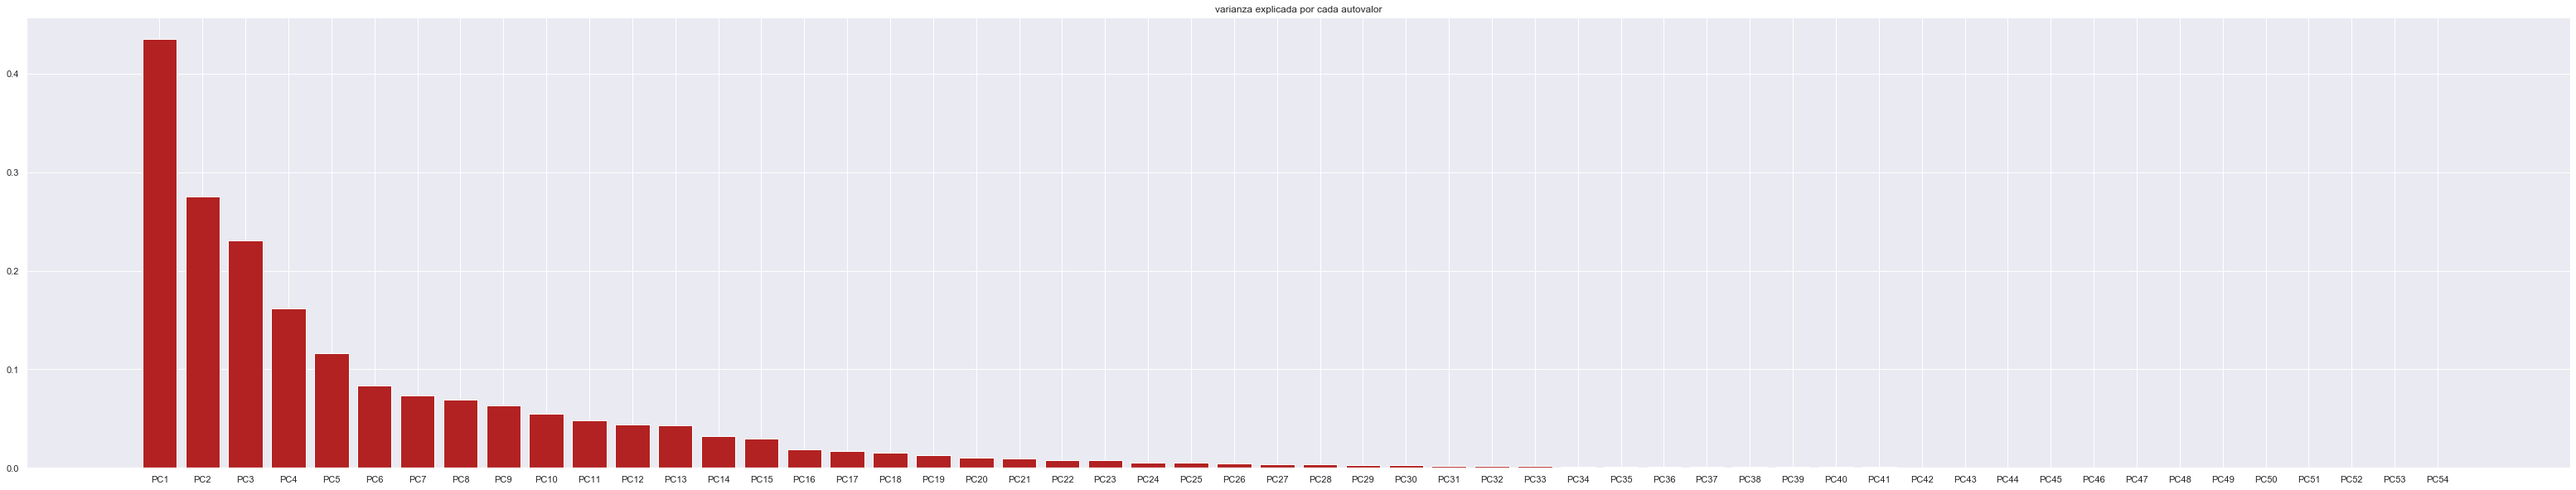

In [59]:
# Varianza explicada por cada autovalor:
plt.figure(figsize=(55, 10))
plt.bar(x=range(1,1+len(evals)), height=evals,
        color='firebrick')
plt.title("varianza explicada por cada autovalor")
plt.xticks(range(1,1+len(evals)),labels)
plt.show()

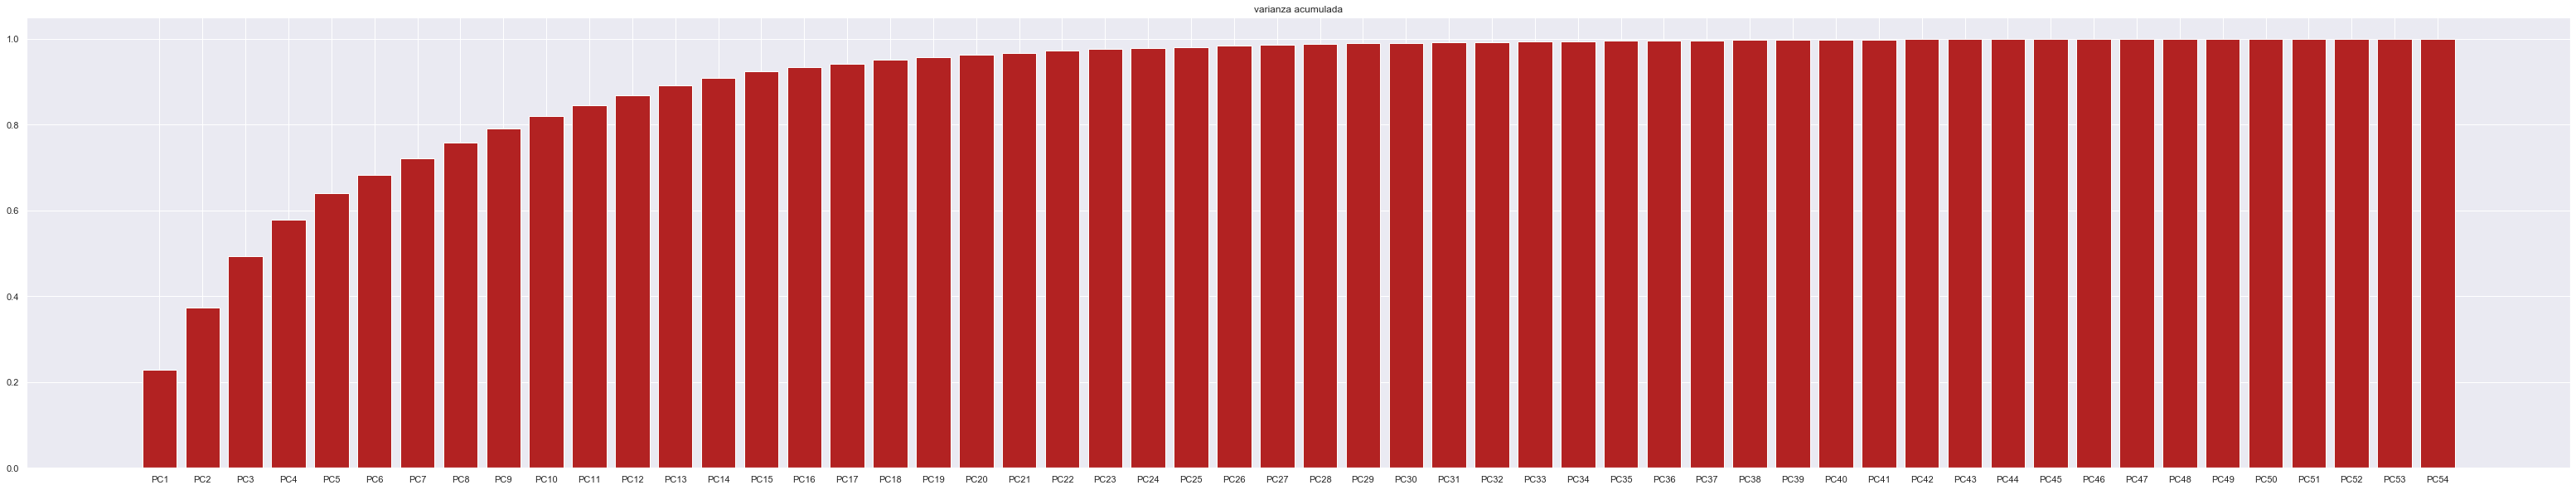

In [60]:
# Gráfica de la varianza acumulada:
plt.figure(figsize=(55, 10))
plt.bar(x=range(1,1+len(evals)), height=pca.explained_variance_ratio_.cumsum(),
        color='firebrick')
plt.title("varianza acumulada")
plt.xticks(range(1,1+len(evals)),labels)
plt.show()

In [61]:
pca.explained_variance_ratio_

array([2.28398891e-01, 1.44537014e-01, 1.20837021e-01, 8.46249374e-02,
       6.09002850e-02, 4.38223872e-02, 3.84380086e-02, 3.62087425e-02,
       3.32705877e-02, 2.86576853e-02, 2.53866934e-02, 2.32334814e-02,
       2.26173950e-02, 1.68251903e-02, 1.55135355e-02, 9.85683834e-03,
       8.75621123e-03, 8.11025765e-03, 6.70972157e-03, 5.52658161e-03,
       5.00151810e-03, 4.01694613e-03, 3.95343669e-03, 2.78691633e-03,
       2.64684462e-03, 2.53019638e-03, 2.07505553e-03, 1.98199991e-03,
       1.59550342e-03, 1.31516048e-03, 1.22215633e-03, 1.05073175e-03,
       9.04937469e-04, 7.84521983e-04, 7.52895919e-04, 6.66399722e-04,
       5.99281495e-04, 5.57490982e-04, 5.45237562e-04, 4.74656937e-04,
       3.81454806e-04, 3.47184418e-04, 3.37917973e-04, 3.11892323e-04,
       2.34998094e-04, 2.03650641e-04, 1.53002903e-04, 1.20675603e-04,
       9.25080881e-05, 8.79723143e-05, 2.51456652e-05, 8.78327562e-06,
       1.10280860e-06, 3.57534112e-07])

In [62]:
pca.explained_variance_ratio_.cumsum()

array([0.22839889, 0.3729359 , 0.49377293, 0.57839786, 0.63929815,
       0.68312054, 0.72155854, 0.75776729, 0.79103787, 0.81969556,
       0.84508225, 0.86831573, 0.89093313, 0.90775832, 0.92327186,
       0.93312869, 0.9418849 , 0.94999516, 0.95670488, 0.96223147,
       0.96723298, 0.97124993, 0.97520337, 0.97799028, 0.98063713,
       0.98316732, 0.98524238, 0.98722438, 0.98881988, 0.99013504,
       0.9913572 , 0.99240793, 0.99331287, 0.99409739, 0.99485029,
       0.99551669, 0.99611597, 0.99667346, 0.9972187 , 0.99769335,
       0.99807481, 0.99842199, 0.99875991, 0.9990718 , 0.9993068 ,
       0.99951045, 0.99966345, 0.99978413, 0.99987664, 0.99996461,
       0.99998976, 0.99999854, 0.99999964, 1.        ])

* **PCA 10 campos**

Empezamos con 10 proyecciones para ver la varianza acumulada qeu obtenemos

In [64]:
pca = PCA(10)
X_pca10 = pca.fit_transform(X_norm)

In [65]:
X_pca10.shape

(19622, 10)

In [66]:
pca.explained_variance_ratio_.cumsum()

array([0.22839889, 0.3729359 , 0.49377293, 0.57839786, 0.63929815,
       0.68312054, 0.72155854, 0.75776728, 0.79103786, 0.81969554])

Vemos que con 10 proyecciones tendríamos el 74% de la varianza acumulada por lo que aumentamos el número de proyecciones para tener más varianza

* **PCA 20 campos**

In [68]:
pca = PCA(20)
X_pca20 = pca.fit_transform(X_norm)

In [69]:
pca.explained_variance_ratio_.cumsum()

array([0.22839889, 0.3729359 , 0.49377293, 0.57839786, 0.63929815,
       0.68312054, 0.72155854, 0.75776729, 0.79103787, 0.81969556,
       0.84508225, 0.86831573, 0.89093313, 0.90775832, 0.92327186,
       0.93312869, 0.9418849 , 0.94999516, 0.95670487, 0.96223145])

Obtendríamos el 91% de la varianza por lo que nos quedamos con 20 proyecciones

In [70]:
dfX_pca20 = pd.DataFrame(X_pca20)

In [71]:
dfX_pca20.shape

(19622, 20)

In [72]:
dfX_pca20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.520814,-0.424468,-0.524059,-0.284007,0.878107,0.354372,0.103728,0.401264,0.102595,-0.087140,0.038114,-0.315551,-0.202529,-0.104941,0.435214,0.245143,0.201402,0.091655,-0.211996,0.050849
1,-0.522499,-0.422186,-0.525319,-0.286811,0.880050,0.374257,0.104987,0.399315,0.103441,-0.092299,0.038644,-0.317928,-0.200770,-0.104203,0.434309,0.247124,0.192241,0.089217,-0.205243,0.032998
2,-0.523453,-0.426845,-0.524548,-0.283573,0.874591,0.386186,0.105466,0.397335,0.104989,-0.086038,0.041248,-0.317298,-0.201628,-0.103131,0.434471,0.245455,0.200714,0.090337,-0.208619,0.045457
3,-0.524530,-0.424132,-0.533573,-0.274300,0.884752,-0.309346,0.127229,0.470762,0.104617,-0.114708,0.039709,-0.295141,-0.186323,-0.114558,0.445594,0.250267,0.202110,0.088081,-0.207167,0.044855
4,-0.525228,-0.423941,-0.529242,-0.278376,0.888140,-0.233555,0.128244,0.464012,0.105931,-0.109940,0.038463,-0.294922,-0.188488,-0.113471,0.442684,0.248430,0.201683,0.089317,-0.209472,0.048947


In [73]:
X_pca = dfX_pca20 
y_pca = df['classe']

In [74]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3,random_state=0)

In [75]:
X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape

((13735, 20), (5887, 20), (13735,), (5887,))

### DECISION TREE CLASSIFIER

In [76]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
from sklearn.metrics import classification_report

y_pred=tree.predict(X_test_pca)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['A', 'B','C','D','E'],
    index  =['True A', 'True B','True C','True D','True E']
)
print(conf)

              precision    recall  f1-score   support

           A       0.32      0.31      0.32      1711
           B       0.19      0.19      0.19      1148
           C       0.17      0.17      0.17      1023
           D       0.16      0.17      0.16       952
           E       0.18      0.18      0.18      1053

    accuracy                           0.22      5887
   macro avg       0.20      0.20      0.20      5887
weighted avg       0.22      0.22      0.22      5887

          A    B    C    D    E
True A  534  303  291  293  290
True B  309  218  195  199  227
True C  274  215  173  175  186
True D  253  201  154  159  185
True E  296  205  200  161  191


Vemos que con un árbol de decisión con los mismos parámetros que hemos calculado antes no se mejora la predicción.

### RANDOM FOREST CLASSIFIER

In [78]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest.fit(X_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [79]:
from sklearn.metrics import classification_report

y_pred=random_forest.predict(X_test_pca)

print(classification_report(y_test_norm, y_pred_norm))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['A', 'B','C','D','E'],
    index  =['True A', 'True B','True C','True D','True E']
)
print(conf)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1711
           B       1.00      1.00      1.00      1148
           C       0.98      1.00      0.99      1023
           D       0.99      0.98      0.99       952
           E       1.00      0.99      0.99      1053

    accuracy                           0.99      5887
   macro avg       0.99      0.99      0.99      5887
weighted avg       0.99      0.99      0.99      5887

          A    B    C    D    E
True A  682  274  237  290  228
True B  450  186  186  193  133
True C  427  148  168  179  101
True D  371  156  132  171  122
True E  409  189  148  161  146


Anteriormente ya teníamos una precisión bastante alta por lo que al aplicar PCA no se mejora.